## Parte 1: Clusterização
Considere o conjunto de dados sobre clientes de um shopping disponibilizado em: 

https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv 

Esse conjunto de dados é composto pelas variáveis CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100). Suponha que o seu trabalho como analista de dados seja encontrar perfis de consumidores. 
    Considerando as variáveis numéricas, faça a clusterização dos dados, encontrando a quantidade ótima de clusters. 
    Mostre os valores dos atributos dos centróides de cada cluster. 
    Que observações podem ser feitas sobre cada cluster? Ou seja, que tipo de cliente cada cluster representa. Discuta.

Extra: crie scatterplots com os dados clusterizados. Considere fazer gráficos dois-a-dois (use a cor para representar gênero):

Annual Income (k$) x Spending Score (1-100)

Annual Income (k$) x Age

Age x Spending Score (1-100)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
from sklearn.cluster import KMeans
X = df.drop(['Gender', 'CustomerID'], axis=1)

#### Aplicação do método do cotovelo para encontrar o melhor número de clusters

C:\Users\Julio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


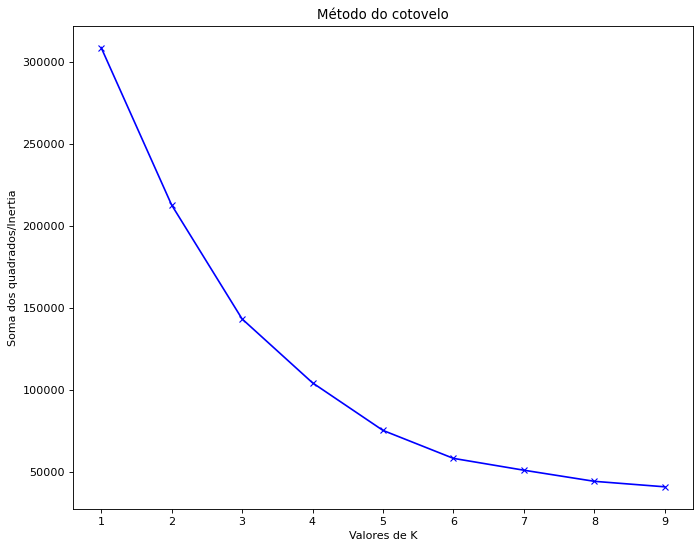

In [5]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
soma_dos_quadrados = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    soma_dos_quadrados.append(kmeans.inertia_)
plt.plot(K,soma_dos_quadrados,'bx-')
plt.xlabel('Valores de K') 
plt.ylabel('Soma dos quadrados/Inertia') 
plt.title('Método do cotovelo')
plt.show()

##### Após analise do gráfico, o número de Clusters escolhido foi 5.

In [6]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [7]:
labels = kmeans.labels_

In [8]:
df['Cluster'] = labels
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [9]:
zero = df['Cluster'] == 0
df[zero]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,0
125,126,Female,31,70,77,0
127,128,Male,40,71,95,0
129,130,Male,38,71,75,0
131,132,Male,39,71,75,0
133,134,Female,31,72,71,0
135,136,Female,29,73,88,0
137,138,Male,32,73,73,0
139,140,Female,35,74,72,0
141,142,Male,32,75,93,0


In [10]:
um = df['Cluster'] == 1
df[um]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
46,47,Female,50,40,55,1
47,48,Female,27,40,47,1
48,49,Female,29,40,42,1
49,50,Female,31,40,42,1
50,51,Female,49,42,52,1
...,...,...,...,...,...,...
120,121,Male,27,67,56,1
121,122,Female,38,67,40,1
122,123,Female,40,69,58,1
126,127,Male,43,71,35,1


In [11]:
dois = df['Cluster'] == 2
df[dois]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
124,125,Female,23,70,29,2
128,129,Male,59,71,11,2
130,131,Male,47,71,9,2
132,133,Female,25,72,34,2
134,135,Male,20,73,5,2
136,137,Female,44,73,7,2
138,139,Male,19,74,10,2
140,141,Female,57,75,5,2
144,145,Male,25,77,12,2
146,147,Male,48,77,36,2


In [12]:
tres = df['Cluster'] == 3
df[tres]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
11,12,Female,35,19,99,3
13,14,Female,24,20,77,3
15,16,Male,22,20,79,3
17,18,Male,20,21,66,3
19,20,Female,35,23,98,3


In [13]:
quatro = df['Cluster'] == 4
df[quatro]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
2,3,Female,20,16,6,4
4,5,Female,31,17,40,4
6,7,Female,35,18,6,4
8,9,Male,64,19,3,4
10,11,Male,67,19,14,4
12,13,Female,58,20,15,4
14,15,Male,37,20,13,4
16,17,Female,35,21,35,4
18,19,Male,52,23,29,4


In [14]:
kmeans.cluster_centers_

array([[32.69230769, 86.53846154, 82.12820513],
       [43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739],
       [45.2173913 , 26.30434783, 20.91304348]])

## Parte 2: Redução de dimensionalidade
Considere o conjunto de dados MNIST utilizado na Atividade 6. Realize a redução de dimensionalidade dos dados com o algoritmo PCA. Escolha um algoritmo de classificação e aplique ele, comparando os resultados com e sem a redução de dimensionalidade. A quantidade de dimensões utilizadas é de sua escolha. Discuta o resultado.

Extra: faça o plot de imagens do dataset após a redução de dimensionalidade.


In [15]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Modelo de classificação(sem PCA)

In [63]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_size = X_train.shape[1] 
input_size = image_size * image_size
print(f'Shape X_train: {X_train.shape}')

Shape X_train: (60000, 28, 28)


In [64]:
X_train = np.reshape(X_train, [-1, input_size])
X_test = np.reshape(X_test, [-1, input_size])

In [65]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
print(f'Shape X_train: {X_train.shape}')

Shape X_train: (60000, 784)


In [67]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_predict = DT.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
A = accuracy_score(y_test, y_predict)
print(f'A acurácia foi de: {round(A*100, 2)}%')

A acurácia foi de: 88.0%


### Aplicando PCA para redução da dimensionalidade

In [70]:
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

(60000, 154)

In [71]:
pca.explained_variance_ratio_.cumsum()

array([0.09704292, 0.16799944, 0.22968796, 0.2835801 , 0.3322662 ,
       0.37538686, 0.4081049 , 0.43694276, 0.46456199, 0.48813109,
       0.50922218, 0.52945132, 0.54660884, 0.56352931, 0.57931512,
       0.59414408, 0.60738918, 0.62015767, 0.63202985, 0.64355624,
       0.6542175 , 0.66428425, 0.67381962, 0.68294471, 0.69177842,
       0.70017129, 0.70829677, 0.71616013, 0.72360718, 0.7305155 ,
       0.73709619, 0.74357742, 0.74960334, 0.75546894, 0.76116894,
       0.76660501, 0.77166268, 0.77654108, 0.7813552 , 0.78607768,
       0.79064498, 0.79509317, 0.79927802, 0.80326002, 0.80710962,
       0.81086051, 0.81448047, 0.81799625, 0.8213967 , 0.82461532,
       0.82780537, 0.83093331, 0.83389302, 0.83678246, 0.83962365,
       0.84233791, 0.84503302, 0.84761765, 0.85015526, 0.85260298,
       0.85500795, 0.85740049, 0.85970449, 0.86191973, 0.86405685,
       0.86612903, 0.86815938, 0.87012713, 0.87205558, 0.87394184,
       0.87581154, 0.8776223 , 0.87939785, 0.88114677, 0.88280

In [72]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
y_predict = DT.predict(X_test)

In [74]:
A = accuracy_score(y_test, y_predict)
print(f'A acurácia foi de: {round(A*100, 2)}%')

A acurácia foi de: 83.24%
